In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# This method won't work because we need to use the index to make this work, but then we need the city name in the URL
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hasaki
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | caravelas
Processing Record 5 of Set 1 | dunedin
Processing Record 6 of Set 1 | barth
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | tiarei
Processing Record 9 of Set 1 | srednekolymsk
Processing Record 10 of Set 1 | jian
Processing Record 11 of Set 1 | yulara
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | victoria
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | atherton
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | luziania
Processing Record 22 of Set 1 | champerico
Processing Record 23 of Set 1 | nylstroom
City not found. S

Processing Record 39 of Set 4 | burnie
Processing Record 40 of Set 4 | butembo
Processing Record 41 of Set 4 | acapulco
Processing Record 42 of Set 4 | cidreira
Processing Record 43 of Set 4 | naryan-mar
Processing Record 44 of Set 4 | berdigestyakh
Processing Record 45 of Set 4 | lugoba
Processing Record 46 of Set 4 | cam pha
City not found. Skipping...
Processing Record 47 of Set 4 | lamu
Processing Record 48 of Set 4 | gao
Processing Record 49 of Set 4 | arraial do cabo
Processing Record 50 of Set 4 | vila franca do campo
Processing Record 1 of Set 5 | sobolevo
Processing Record 2 of Set 5 | lorengau
Processing Record 3 of Set 5 | almaznyy
Processing Record 4 of Set 5 | geraldton
Processing Record 5 of Set 5 | veraval
Processing Record 6 of Set 5 | trelleborg
Processing Record 7 of Set 5 | talnakh
Processing Record 8 of Set 5 | upernavik
Processing Record 9 of Set 5 | fortuna
Processing Record 10 of Set 5 | layou
Processing Record 11 of Set 5 | bud
Processing Record 12 of Set 5 | va

Processing Record 27 of Set 8 | fevik
Processing Record 28 of Set 8 | richards bay
Processing Record 29 of Set 8 | lavrentiya
Processing Record 30 of Set 8 | leshukonskoye
Processing Record 31 of Set 8 | fort nelson
Processing Record 32 of Set 8 | huai thalaeng
Processing Record 33 of Set 8 | phillipsburg
Processing Record 34 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 35 of Set 8 | marihatag
Processing Record 36 of Set 8 | mount gambier
Processing Record 37 of Set 8 | sjenica
Processing Record 38 of Set 8 | leh
Processing Record 39 of Set 8 | dauphin
Processing Record 40 of Set 8 | sao filipe
Processing Record 41 of Set 8 | bani walid
Processing Record 42 of Set 8 | adrar
Processing Record 43 of Set 8 | manono
Processing Record 44 of Set 8 | maridi
Processing Record 45 of Set 8 | shizunai
Processing Record 46 of Set 8 | coos bay
Processing Record 47 of Set 8 | burica
City not found. Skipping...
Processing Record 48 of Set 8 | asau
Processing Record 49 of Set 8 |

Processing Record 16 of Set 12 | teguldet
Processing Record 17 of Set 12 | palauig
Processing Record 18 of Set 12 | camacha
Processing Record 19 of Set 12 | dallas
Processing Record 20 of Set 12 | havelock
Processing Record 21 of Set 12 | qandala
Processing Record 22 of Set 12 | kaabong
Processing Record 23 of Set 12 | turayf
Processing Record 24 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 25 of Set 12 | elko
Processing Record 26 of Set 12 | meulaboh
Processing Record 27 of Set 12 | robe
Processing Record 28 of Set 12 | bereda
Processing Record 29 of Set 12 | puerto escondido
Processing Record 30 of Set 12 | zhangye
Processing Record 31 of Set 12 | kuminskiy
Processing Record 32 of Set 12 | viransehir
Processing Record 33 of Set 12 | mitu
Processing Record 34 of Set 12 | mantua
Processing Record 35 of Set 12 | upata
Processing Record 36 of Set 12 | half moon bay
Processing Record 37 of Set 12 | duartina
Processing Record 38 of Set 12 | khani
Processing Record

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hasaki,35.7333,140.8333,45.00,58,0,17.72,JP,2021-11-23 22:09:13
1,Tasiilaq,65.6145,-37.6368,21.36,59,36,5.95,GL,2021-11-23 22:05:42
2,Ushuaia,-54.8000,-68.3000,44.26,81,75,9.22,AR,2021-11-23 22:09:14
3,Caravelas,-17.7125,-39.2481,72.21,86,26,6.26,BR,2021-11-23 22:09:14
4,Dunedin,-45.8742,170.5036,58.73,59,100,1.81,NZ,2021-11-23 22:05:07
5,Barth,54.3635,12.7249,49.08,69,21,18.14,DE,2021-11-23 22:05:44
6,Busselton,-33.6500,115.3333,54.05,75,1,7.40,AU,2021-11-23 22:09:15
7,Tiarei,-17.5333,-149.3333,87.82,76,98,4.56,PF,2021-11-23 22:09:15
8,Srednekolymsk,67.4500,153.6833,-22.07,97,100,3.65,RU,2021-11-23 22:09:15
9,Jian,27.1172,114.9793,45.07,68,95,1.43,CN,2021-11-23 22:09:15


In [9]:
reorder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[reorder]

In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

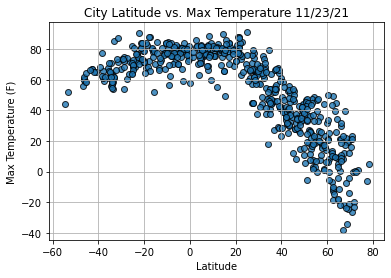

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

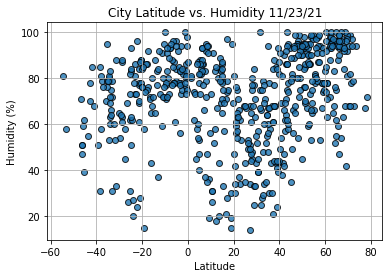

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

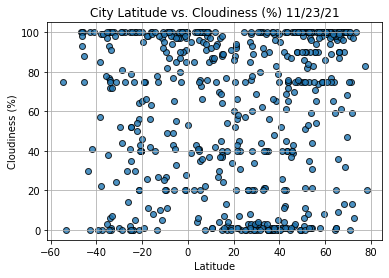

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

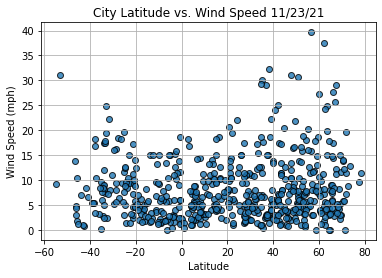

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
##### Create Function 


# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

NameError: name 'x_values' is not defined